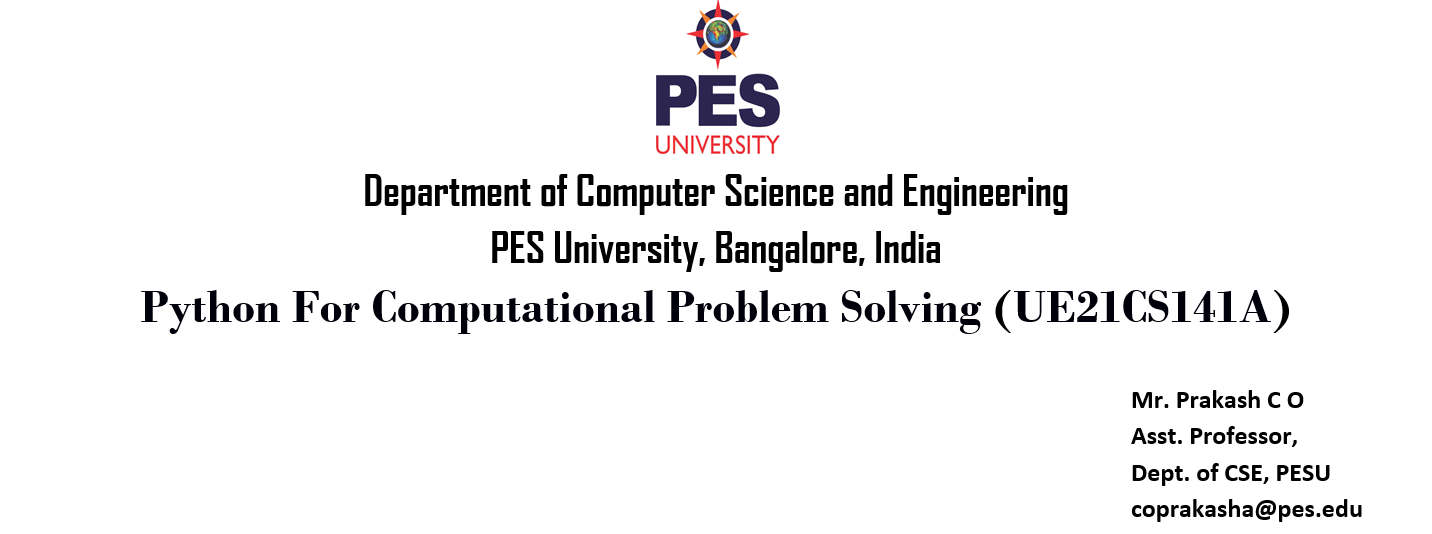

### Retaining State With Inner Functions: Closures
Closures are dynamically created functions that are returned by other functions. Their main feature is that they have full access to the variables and names defined in the local namespace where the closure was created, even though the enclosing function has returned and finished executing.

In Python, when you return an inner function object, the interpreter packs the function along with its containing environment or closure. The function object keeps a snapshot of all the variables and names defined in its containing scope. 

To define a closure, you need to take three steps:

* Create an inner function.
* Reference variables from the enclosing function.
* Return the inner function.

With this basic knowledge, you can start creating your closures right away and take advantage of their main feature: retaining state between function calls.

##### Retaining State in a Closure
A closure causes the inner function to retain the state of its environment when called. 
###### The closure isn’t the inner function itself but the inner function along with its enclosing environment. The closure captures the local variables and name in the containing function and keeps them around.

Consider the following example:

In [3]:
def generate_power(exponent):
    def power(base):
        return base ** exponent
    
    return power

raise_two = generate_power(2)
raise_three = generate_power(3)

125

Where does power() get the value of exponent from? This is where the closure comes into play. In this example, power() gets the value of exponent from the outer function, generate_power(). 

Here’s what Python does when you call generate_power():

1) Define a new instance of power(), which takes a single argument base.

2) Take a snapshot of the surrounding state of power(), which includes exponent with its current value.

3) Return power() along with its whole surrounding state.

This way, when you call the instance of power() returned by generate_power(), you’ll see that the function remembers the value of exponent:

In [4]:
print(raise_two(4))
print(raise_two(5))

print(raise_three(4))
print(raise_three(5))

16
25
64
125


In [1]:
def outerFunction(text): # factory function
    text = text 
  
    def innerFunction():# inner function
        print(text) 
    
    # reference of inner function is returned by the factory function.
    return innerFunction  # Note we are returning function WITHOUT parenthesis 
  
myFunction1 = outerFunction('Hello') 
myFunction2 = outerFunction('How are You?') 
myFunction1() 
myFunction2() 

Hey!
Hello


###### Important observations:
* As observed from above code, closures help to invoke function outside their scope.
* The function innerFunction has its scope only inside the outerFunction. But with the use of closures we can easily extend its scope to invoke a function outside its scope.

In [12]:
def repeat(n):
    def set_word(word):
        return word * n    # this n will be remembered!
    
    return set_word

r7 = repeat(7)  # r7 is a set_word function object
print(r7('Hello '))
r10 = repeat(10) 
print(r10('Hi '))
print(r10.__closure__[0].cell_contents)

Hello Hello Hello Hello Hello Hello Hello 
Hi Hi Hi Hi Hi Hi Hi Hi Hi Hi 
10


The variable r7 remembers the value of n from the enclosing repeat function even after being returned by it:

In [12]:
print(r7('hi '))

hi hi hi hi hi hi hi 


In [11]:
print(r7('yes '))
#print(r7.__closure__)
print(r7.__closure__[0].cell_contents)

yes yes yes yes yes yes yes 
7


Here the outer sliceN function returns the inner initial function, which remembers the value of n from the outer function:

In [8]:
def sliceN(n):
    def initial(word):
        return word[:n]
    
    return initial

s3 = sliceN(3)
print(s3("unbelievable"))

unb


In [9]:
s8 = sliceN(8)
print(s8("unbelievable"))
print(s8("surprise"))

unbeliev
surprise


###### When do we have a closure?
As seen from the above example, we have a closure in Python when a nested function references a value in its enclosing scope.
The criteria that must be met to create closure in Python are summarized in the following points.
* We must have a nested function (function inside a function).
* The nested function must refer to a value defined in the enclosing function.
* The enclosing function must return the nested function.

###### When to use closures?

So what are closures good for?

Closures can avoid the use of global values and provides some form of data hiding. It can also provide an object oriented solution to the problem.
When there are few methods (one method in most cases) to be implemented in a class, closures can provide an alternate and more elegant solutions. But when the number of attributes and methods get larger, better implement a class.

Here is a simple example where a closure might be more preferable than defining a class and making objects. But the preference is all yours.


In [1]:
def make_multiplier_of(n):
    def multiplier(x):	# inner function
        return x * n

    return multiplier

times3 = make_multiplier_of(3) # Multiplier of 3
times5 = make_multiplier_of(5) # Multiplier of 5

print(times3(9)) # Output: 27
print(times5(3)) # Output: 15
print(times5(times3(2))) # Output: 30

27
15
30


On a concluding note, it is good to point out that the values that get enclosed in the closure function can be found out.

All function objects have a __closure__ attribute that returns a tuple of cell objects if it is an inner function with closure. 

Referring to the example above, we know times3 and times5 are inner functions with closure.

In [2]:
print(make_multiplier_of.__closure__)  # output is None, because it’s a outer function
print(times3.__closure__)  # (<cell at 0x0000000002D155B8: int object at 0x000000001E39B6E0>,)

None
(<cell at 0x000001B02CA01F40: int object at 0x00007FFFA72B2760>,)


The cell object has the attribute cell_contents which stores the closed value.

In [3]:
print(times3.__closure__[0].cell_contents) # output is 3
print(times5.__closure__[0].cell_contents) # output is 5

3
5


When and why to use Closures:
1) As closures are used as callback functions, they provide some sort of data hiding. This helps us to reduce the use of global variables.

2) When we have few functions in our code, closures prove to be efficient way. But if we need to have many functions, then go for class (OOP).


In [1]:
# A Real World Example
def has_permission(page):
    def inner(username):
        if username == 'Admin':
            return "'{0}' does have access to {1}.".format(username, page)
        else:
            return "'{0}' does NOT have access to {1}.".format(username, page)
    return inner

current_user = has_permission('Admin Area')
print(current_user('Admin'))

random_user = has_permission('Admin Area')
print(random_user('Not Admin'))

'Admin' does have access to Admin Area.
'Not Admin' does NOT have access to Admin Area.


This is a simplified function to check if a certain user has the correct permissions to access a certain page. You could easily modify this to grab the user in session to check if they have the correct credentials to access a certain route. Instead of checking if the user is just equal to 'Admin', you could query the database to check the permission and then return the correct view depending on whether the credentials are correct or not.
###### Conclusion
The use of closures and factory functions is the most common and powerful use for inner functions. In most cases, when you see a decorated function, the decorator is a factory function that takes a function as argument and returns a new function that includes the old function inside the closure. Stop. Take a deep breath. Grab a coffee. Read that again.


### Callback
The mechanism of passing a function name as argument and calling it indirectly is called callback.

A callback is a function that's called from within another, having initially been "registered" for use at an outer level earlier on.

In this program, we define two functions foo1 and foo2. We define a function bar which takes one argument. We invoke the function bar and we pass the function name foo1 as the argument in the first call. The parameter fn gets foo1 and so becomes callable. When the bar executes to call to fn, it calls the function foo1. In the second call, bar ends up calling foo2.

Observe that the function bar is flexible. It does not know which function will be invoked when fn is called. It depends on what the user specifies as the argument. 
###### This mechanism of passing a function name as argument and calling it indirectly is called callback. We use this concept very heavily in programming.


In [2]:
def foo1():
    print("this is foo1")

def foo2():
    print("this is foo2")

def bar(fn): # the parameter fn gets function reference and so becomes callable
    fn()

bar(foo1)
bar(foo2)

this is foo1
this is foo2


###### Some more examples of callback:
There are many built-in functions which take the callback as an argument.

Let us examine the function sorted. It returns a sorted list. It takes as the first argument an iterable.

By default, the elements of the iterable are compared as they are and rearranged if the elements are not in the right order.
We can provide a function by which each of the elements is changed before comparing using the less than operator. For this purpose, we should provide a callable which takes one argument. This argument will be provided as the sorted function walks through the iterable. Instead of comparing the elements of the iterable directly, the function is called on each of these elements and the results are compared and based on this comparison, the elements in the list are arranged.

Sorted creates a temporary list by applying str.upper on each element.

[‘ABCD’, ‘XYZ’, ‘ABEF’, ‘BX’, ‘ZSS’].

Based on the comparison of these elements, the elements of a are ordered.

In [2]:
l1=[6,7,2,3]
l2=sorted(l1)
print(l2)

[2, 3, 6, 7]


In [1]:
a = ['abcd', 'XyZ', 'Abef', 'Bx', 'zss']
print(sorted(a))
print(sorted(a, key = str.upper))

# Syntax:  sorted(iterable, key=None, reverse=False)
#  key -> A function to execute to decide the order. Default is None

['Abef', 'Bx', 'XyZ', 'abcd', 'zss']
['abcd', 'Abef', 'Bx', 'XyZ', 'zss']


###### The callback is an amazing concept. The sorted function is flexible. It does not hardcode the way of comparison. The user can decide how to compare based on the function being passed as a callback.

In the below example. The callback key is a lambda function – which combines 0th and 2nd character by concatenation. This value decides the ordering.

In [4]:
a = [ 'abcd', 'axae', 'xcyz', 'xwxz' ]
# combine 0th and 2nd char
print(sorted(a, key = lambda s : s[0] + s[2]))

['axae', 'abcd', 'xwxz', 'xcyz']


In [5]:
# Example 1:
def add(numbers, callback):
    results = []
    for i in numbers:
        results.append(callback(i))
    return results

def add2(number):
    return number + 2

def mul2(number):
    return number * 2

print(add([1,2,3,4], add2)) # [3, 4, 5, 6]
print(add([1,2,3,4], mul2)) # [2, 4, 6, 8]

[3, 4, 5, 6]
[2, 4, 6, 8]


In [6]:
# Example 2:

authors = ['Octavia Butler', 'Isaac Asimov', 'Neal Stephenson', 'Margaret Atwood', 'Usula K Le Guin', 'Ray Bradbury']
print(sorted(authors, key=len))  # Returns list ordered by length of author name

# Returns list ordered alphabetically by last name.
print(sorted(authors, key=lambda name: name.split()[-1]))  

['Isaac Butler', 'Ray Bradbury', 'Octavia Butler', 'Neal Stephenson', 'Margaret Atwood', 'Usula K Le Guin']
['Margaret Atwood', 'Ray Bradbury', 'Isaac Butler', 'Octavia Butler', 'Usula K Le Guin', 'Neal Stephenson']


In [8]:
# Example 3:  #sort the given list and display.
s = [("890","ram",(95,78,99)),("123","kishan",(90,98,89)),("567","arjun",(59,68,100))]
srn = sorted(s)
print("Student list is sorted based on 1st field, SRN:\n", srn)

Student list is sorted based on 1st field, SRN:
 [('123', 'kishan', (90, 98, 89)), ('567', 'arjun', (59, 68, 100)), ('890', 'ram', (95, 78, 99))]


In [7]:
# Example 4:  #sort the list based on the name and display.
s = [("890","ram",(95,78,99)),("123","kishan",(90,98,89)),("567","arjun",(59,68,100))]
name = sorted(s, key = lambda t: t[2])
print("Student list is sorted based on 2nd field, Name:\n", name)

Student list is sorted based on 2nd field, Name:
 [('567', 'arjun', (59, 68, 100)), ('123', 'kishan', (90, 98, 89)), ('890', 'ram', (95, 78, 99))]


In [10]:
# Example 5:  #sort the list based on the total of P C M marks in descending order and display.
s = [("890","ram",(95,78,99)),("123","kishan",(90,98,89)),("567","arjun",(59,68,100))]
PCM = sorted(s, reverse = True, key = lambda t: sum(t[2]))
print("Student list is sorted based on total of PCM marks in descending order:\n", PCM)

Student list is sorted based on total of PCM marks in descending order:
 [('123', 'kishan', (90, 98, 89)), ('890', 'ram', (95, 78, 99)), ('567', 'arjun', (59, 68, 100))]


References:
1.	function_parameters_3.pdf – Prof. N S Kumar, Dept. of CSE, PES University.
2.	https://www.w3schools.com/python
3.	https://docs.python.org/